In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
target = df['koi_disposition'].values.reshape(-1, 1)
target_names = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']

data = df.drop('koi_disposition', axis=1)
feature_names = data.columns
data.head()
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [41]:
len(data)

8744

# Pre-processing

Scale the data using the MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [5]:
from sklearn.svm import SVC 

In [6]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, np.ravel(y_train,order='C'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8502592253735896
Testing Data Score: 0.838975297346752


                precision    recall  f1-score   support

     CANDIDATE       0.73      0.56      0.63       523
     CONFIRMED       0.68      0.80      0.73       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.84      0.84      0.84      2186
     macro avg       0.80      0.78      0.79      2186
  weighted avg       0.84      0.84      0.83      2186



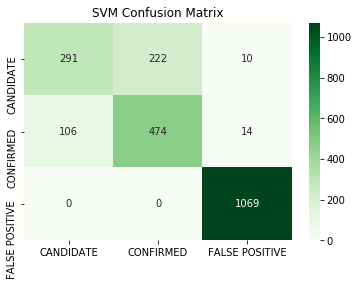

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

# Predicted outcomes
predictions = model.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('SVM Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions))

# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [9]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100,1000,10000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [10]:
# Train the model with GridSearch
grid.fit(X_train_scaled, np.ravel(y_train,order='C'))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=1 ..................................................


C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, score=0.8217550274223034, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.8233409610983982, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.8279176201372997, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8217550274223034, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8233409610983982, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8279176201372997, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8217550274223034, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8233409610983982, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8279176201372997, total=   0.5s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........ C=1000, gamma=1, score=0.8957952468007313, total=   2.6s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8750572082379863, total=   1.9s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.8974828375286041, total=   2.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8957952468007313, total=   2.6s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8750572082379863, total=   2.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.8974828375286041, total=   2.4s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.8957952468007313, total=   2.6s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1000, 'gamma': 1}
0.8894480024397682


In [12]:
model2 = SVC(kernel='linear',C=1000,gamma=1)
model2.fit(X_train_scaled, np.ravel(y_train,order='C'))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8937175968283013
Testing Data Score: 0.8879231473010064


                precision    recall  f1-score   support

     CANDIDATE       0.84      0.69      0.76       523
     CONFIRMED       0.77      0.86      0.81       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.89      0.89      0.89      2186
     macro avg       0.86      0.85      0.85      2186
  weighted avg       0.89      0.89      0.89      2186



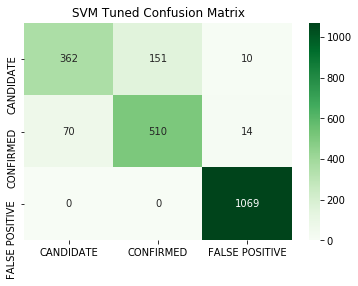

In [14]:
# Predicted outcomes
predictions2 = model2.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions2))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('SVM Tuned Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions2))

# Naive Bayes 

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
model3 = GaussianNB()
model3.fit(X_train_scaled, np.ravel(y_train))

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.7580054894784996
Testing Data Score: 0.757548032936871


                precision    recall  f1-score   support

     CANDIDATE       0.55      0.37      0.45       523
     CONFIRMED       0.60      0.91      0.72       594
FALSE POSITIVE       0.99      0.86      0.92      1069

     micro avg       0.76      0.76      0.76      2186
     macro avg       0.71      0.71      0.70      2186
  weighted avg       0.78      0.76      0.75      2186



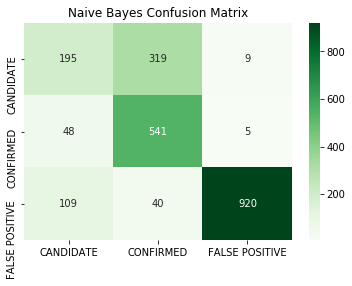

In [18]:
predictions3 = model3.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions3))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Naive Bayes Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions3))

# Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=500)
model4.fit(X_train_scaled, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
print(f"Training Data Score: {model4.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model4.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8961573650503202


                precision    recall  f1-score   support

     CANDIDATE       0.84      0.73      0.78       523
     CONFIRMED       0.81      0.86      0.83       594
FALSE POSITIVE       0.97      1.00      0.98      1069

     micro avg       0.90      0.90      0.90      2186
     macro avg       0.87      0.86      0.87      2186
  weighted avg       0.89      0.90      0.89      2186



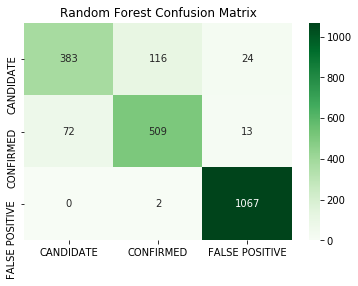

In [21]:
# Predicted outcomes
predictions4 = model4.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions4))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions4))

# Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model5.fit(X_train_scaled, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
print(f"Training Data Score: {model5.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model5.score(X_test_scaled, y_test)}")

Training Data Score: 0.9257395547422995
Testing Data Score: 0.9039341262580055


                precision    recall  f1-score   support

     CANDIDATE       0.85      0.77      0.81       523
     CONFIRMED       0.82      0.86      0.84       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.90      0.90      0.90      2186
     macro avg       0.88      0.87      0.88      2186
  weighted avg       0.90      0.90      0.90      2186



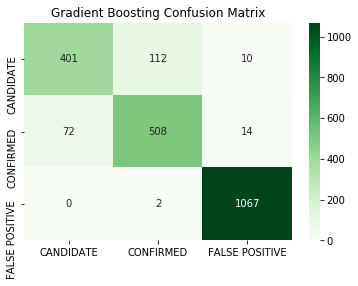

In [24]:
# Predicted outcomes
predictions5 = model5.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions5))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Gradient Boosting Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions5))

# K Neighbors

k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.799
k: 5, Train/Test Score: 0.869/0.812
k: 7, Train/Test Score: 0.862/0.812
k: 9, Train/Test Score: 0.857/0.810
k: 11, Train/Test Score: 0.851/0.805
k: 13, Train/Test Score: 0.848/0.802
k: 15, Train/Test Score: 0.847/0.809
k: 17, Train/Test Score: 0.843/0.806
k: 19, Train/Test Score: 0.840/0.808


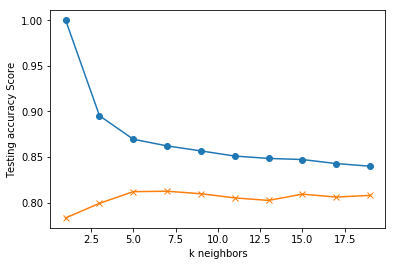

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, np.ravel(y_train))
    train_score = knn.score(X_train_scaled, np.ravel(y_train))
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
print(f"Training Data Score: {model6.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model6.score(X_test_scaled, y_test)}")

Training Data Score: 0.8694724001219885
Testing Data Score: 0.8119853613906679


                precision    recall  f1-score   support

     CANDIDATE       0.65      0.52      0.58       523
     CONFIRMED       0.64      0.73      0.69       594
FALSE POSITIVE       0.98      1.00      0.99      1069

     micro avg       0.81      0.81      0.81      2186
     macro avg       0.76      0.75      0.75      2186
  weighted avg       0.81      0.81      0.81      2186



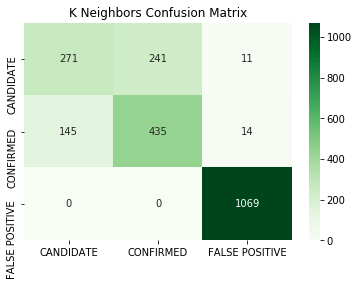

In [28]:
# Predicted outcomes
predictions6 = model6.predict(X_test_scaled)


ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions6))
sns.heatmap(cm, annot=True, ax = ax,cmap='Greens',fmt='g') #annot=True to annotate cells

# labels, title and ticks
ax.set_title('K Neighbors Confusion Matrix')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
print(classification_report(y_test,predictions6))

In [30]:
preds = [predictions,predictions2,predictions3,predictions4,predictions5,predictions6]
errors = []
for pred in preds:
    err = 0
    x=0
    for _ in pred:
        if y_test[x] != pred[x]:
            err += 1
        x += 1
    errors.append(err)    

In [31]:
df_data = {'Model':['SVM','SVM-Hypertuned','Naive Bayes','Random Forests','Gradient Boosting','K Neighbors'],'Errors':errors}

df = pd.DataFrame(df_data)
df

,Model,Errors
0,SVM,352
1,SVM-Hypertuned,245
2,Naive Bayes,530
3,Random Forests,227
4,Gradient Boosting,210
5,K Neighbors,411


# One and then the rest

In [32]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

In [33]:
target = pd.get_dummies(df["koi_disposition"])
df = pd.concat([df,target],axis=1)
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0


In [34]:
df.drop(['koi_disposition'],axis=1,inplace=True)
df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,CANDIDATE,CONFIRMED,FALSE POSITIVE
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0


In [35]:
# Use train_test_split to create training and testing data
X = df.drop('CANDIDATE',axis=1)
y = df['CANDIDATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [37]:
logmodel.fit(X_train,y_train)

C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bethf\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predictions7 = logmodel.predict(X_test)

In [39]:
print(f"Training Data Score: {logmodel.score(X_train, y_train)}")
print(f"Testing Data Score: {logmodel.score(X_test, y_test)}")

Training Data Score: 0.7573955474229949
Testing Data Score: 0.7584629460201281


In [40]:
# Predicted outcomes
predictions7 = logmodel.predict(X_test)

print(classification_report(y_test,predictions7))
print(confusion_matrix(y_test,predictions7))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1663
           1       0.00      0.00      0.00       523

   micro avg       0.76      0.76      0.76      2186
   macro avg       0.38      0.50      0.43      2186
weighted avg       0.58      0.76      0.66      2186

[[1658    5]
 [ 523    0]]
